In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, precision_score,roc_auc_score,roc_curve, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [35]:
# Data splitting
x = df.drop('target', axis=1)
y = df['target']

# select the best features
selector = SelectKBest(score_func=chi2, k=10)
x_new = selector.fit_transform(x,y)

selected_features = x.columns[selector.get_support()]
print('selected features:', selected_features)

# split the dataset

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)

print("Selected Features Shape:", x_new.shape)
print("X_train Shape:", x_train.shape)
print("X_test Shape:", x_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

selected features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')
Selected Features Shape: (303, 10)
X_train Shape: (242, 10)
X_test Shape: (61, 10)
y_train Shape: (242,)
y_test Shape: (61,)


In [36]:
# cross-validation


x = df.drop('target', axis=1)
y =df['target']

# select th best features
selector = SelectKBest(score_func=chi2, k=10)
x_new = selector.fit_transform(x,y)

# initialize stratifiedkfold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# initialize the model
model = RandomForestClassifier(random_state=42)

# perform cross-validation
scores = cross_val_score(model, x_new, y, cv=skf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())


Cross-validation scores: [0.90163934 0.80327869 0.78688525 0.83333333 0.76666667]
Mean cross-validation score: 0.818360655737705


In [37]:
# Training and evaluating the model
# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)

#train the model
model.fit(x_train, y_train)

# make predictions

y_pred = model.predict(x_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Test set accuracy:', accuracy)
print('classification_report:\n',report)


Test set accuracy: 0.8688524590163934
classification_report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61




Random Forest Performance metrics:

Acuracy: 0.8689
Precision: 0.8750
Recall: 0.8750
F1: 0.8750
ROC AUC: 0.9079


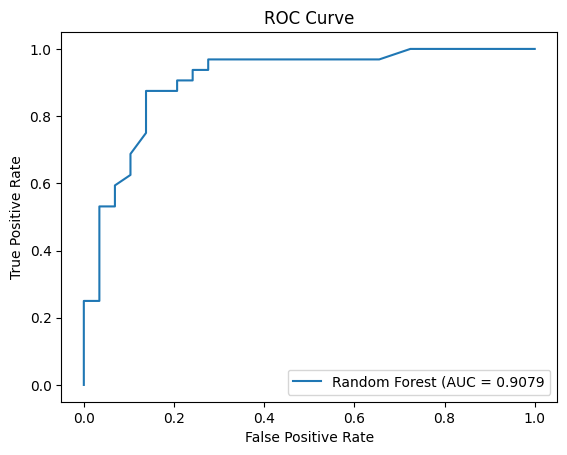


Logistic Regression Performance metrics:

Acuracy: 0.8525
Precision: 0.8966
Recall: 0.8125
F1: 0.8525
ROC AUC: 0.9192


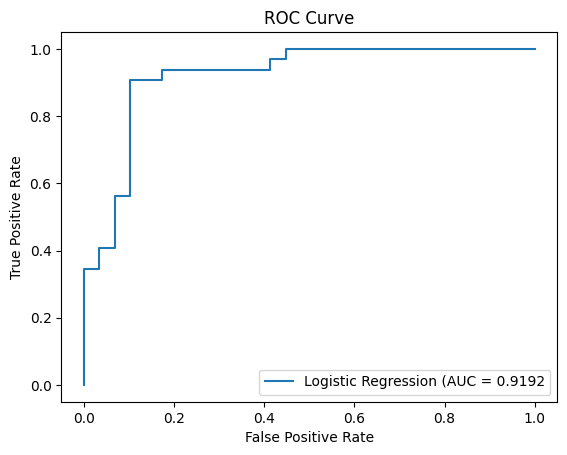


Support Vector Machine Performance metrics:

Acuracy: 0.7049
Precision: 0.6667
Recall: 0.8750
F1: 0.7568
ROC AUC: 0.6961

Decision Tree Performance metrics:

Acuracy: 0.7705
Precision: 0.8462
Recall: 0.6875
F1: 0.7586
ROC AUC: 0.7748


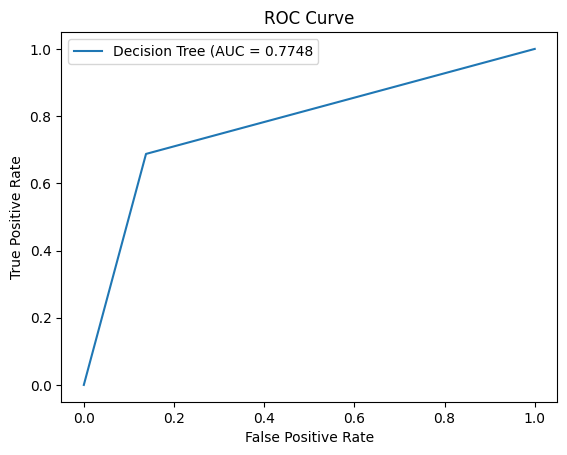


K-Nearest Neighbors Performance metrics:

Acuracy: 0.6885
Precision: 0.6857
Recall: 0.7500
F1: 0.7164
ROC AUC: 0.7613


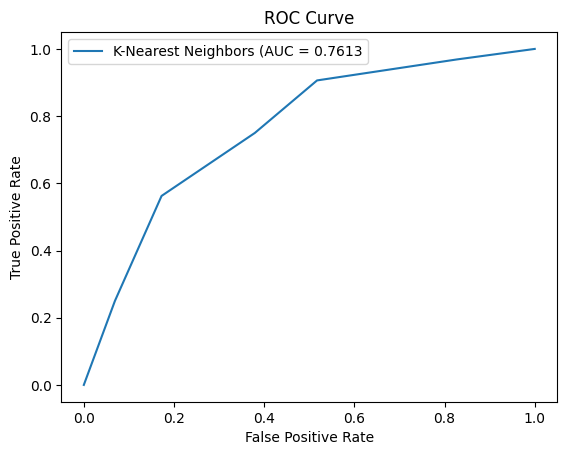

In [44]:
# classification accuracy of the the algorithms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# intialize models
models = {
    'Random Forest':RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Support Vector Machine':SVC(random_state=42),
    'Decision Tree':DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors':KNeighborsClassifier()
}
#Evaluate the metrics
metrics ={
    'Acuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1': f1_score,
    'ROC AUC': roc_auc_score
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    if hasattr(model, 'predict_proba'):
       y_prob = model.predict_proba(x_test)[:,1]
    else:
        y_prob = None   

# calculate and print the metrics
    print(f'\n{model_name} Performance metrics:\n')
    for metric_name, metric in metrics.items():
        if metric_name == 'ROC AUC' and y_prob is not None:
           metric_value = metric(y_test, y_prob)
        elif metric_name in ['Precision', 'Recall', 'F1']:
            metric_value = metric(y_test, y_pred, average='binary')   
        else:
            metric_value = metric(y_test, y_pred)   
        print(f'{metric_name}: {metric_value:.4f}')
 
    # plot the ROC curve
    if  y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_prob):.4f}' )

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()
           
    

In [ ]:
# Give actionable insights of the models
# Best performing model;
# Balance model;
# worst performing model;
# conclusion


In [ ]:
# Recomendations
# models considered for deployment
# models needing further tuning
# 